# Model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import joblib 

In [2]:
df = pd.read_csv('./data/listing_cleaned.csv')
df.head()

,accommodates,bedrooms,beds,bathrooms,rating,price,bath_type_private,bath_type_shared,bath_type_standard,room_type_entire,...,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace
0,1,1.0,1.0,1.0,4.60,99.0,False,False,True,True,...,False,False,True,False,False,False,False,False,False,False
1,2,1.0,1.0,3.0,4.72,67.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,2.0,3.0,1.0,4.97,184.0,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,3,2.0,2.0,1.0,4.99,155.0,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,4,2.0,2.0,1.0,4.80,228.0,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.describe()

,accommodates,bedrooms,beds,bathrooms,rating,price
count,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000
mean,4.174803,1.659170,2.235144,1.434083,4.795784,159.719510
std,2.593422,1.183331,1.502960,0.810387,0.356598,126.175497
min,1.000000,0.000000,1.000000,0.000000,1.000000,14.000000
25%,2.000000,1.000000,1.000000,1.000000,4.760000,92.000000
50%,4.000000,1.000000,2.000000,1.000000,4.890000,129.000000
75%,6.000000,2.000000,3.000000,2.000000,4.980000,187.000000
max,16.000000,13.000000,16.000000,16.000000,5.000000,3071.000000


## Random forest model

In [4]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
# random forest model
rf_model = RandomForestRegressor(random_state=42)

# train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# dump the model
joblib.dump(rf_model, './model/rf_model.joblib')

['./model/rf_model.joblib']

In [7]:
# predictions
rf_pred = rf_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, rf_pred, squared=False)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
MSE: 99.07109148946431
MAE: 53.47960614044008
R-squared: 0.4174199031800282


In [8]:
def analyze_plot(model, X, y, X_train, X_test, y_train, y_test):
    TRAIN_C = '#2B94E9'
    TEST_C = '#94BA65'

    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(30, 8)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)    
    
    ax[0].scatter(y_train, train_pred, c=TRAIN_C, alpha=0.4)
    ax[0].set_xlabel('Actual Values')
    ax[0].set_ylabel('Prediction')
    ax[0].set_title('Prediction vs. Actual values in TRAINING set')
    ax[0].plot((train_pred.min(), train_pred.max()), (train_pred.min(), train_pred.max()), ls='--',c='red')

    ax[1].scatter(y_test, test_pred, c=TEST_C, alpha=0.4)
    ax[1].set_xlabel('Actual Values')
    ax[1].set_ylabel('Prediction')
    ax[1].set_title('Prediction vs. Actual values in TEST set')
    ax[1].plot((test_pred.min(), test_pred.max()), (test_pred.min(), test_pred.max()), ls='--',c='red')
    
    ax[2].scatter(model.predict(X_train), model.predict(X_train) - y_train, c=TRAIN_C, alpha=0.2, label='Train Set')
    ax[2].scatter(model.predict(X_test), model.predict(X_test) - y_test, c=TEST_C, alpha=0.2, label='Test Set')
    ax[2].set_xlabel('Prediction')
    ax[2].set_ylabel('Residuals')
    ax[2].axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
    ax[2].set_title('Residual Plot')
    ax[2].grid(True)
    ax[2].legend()

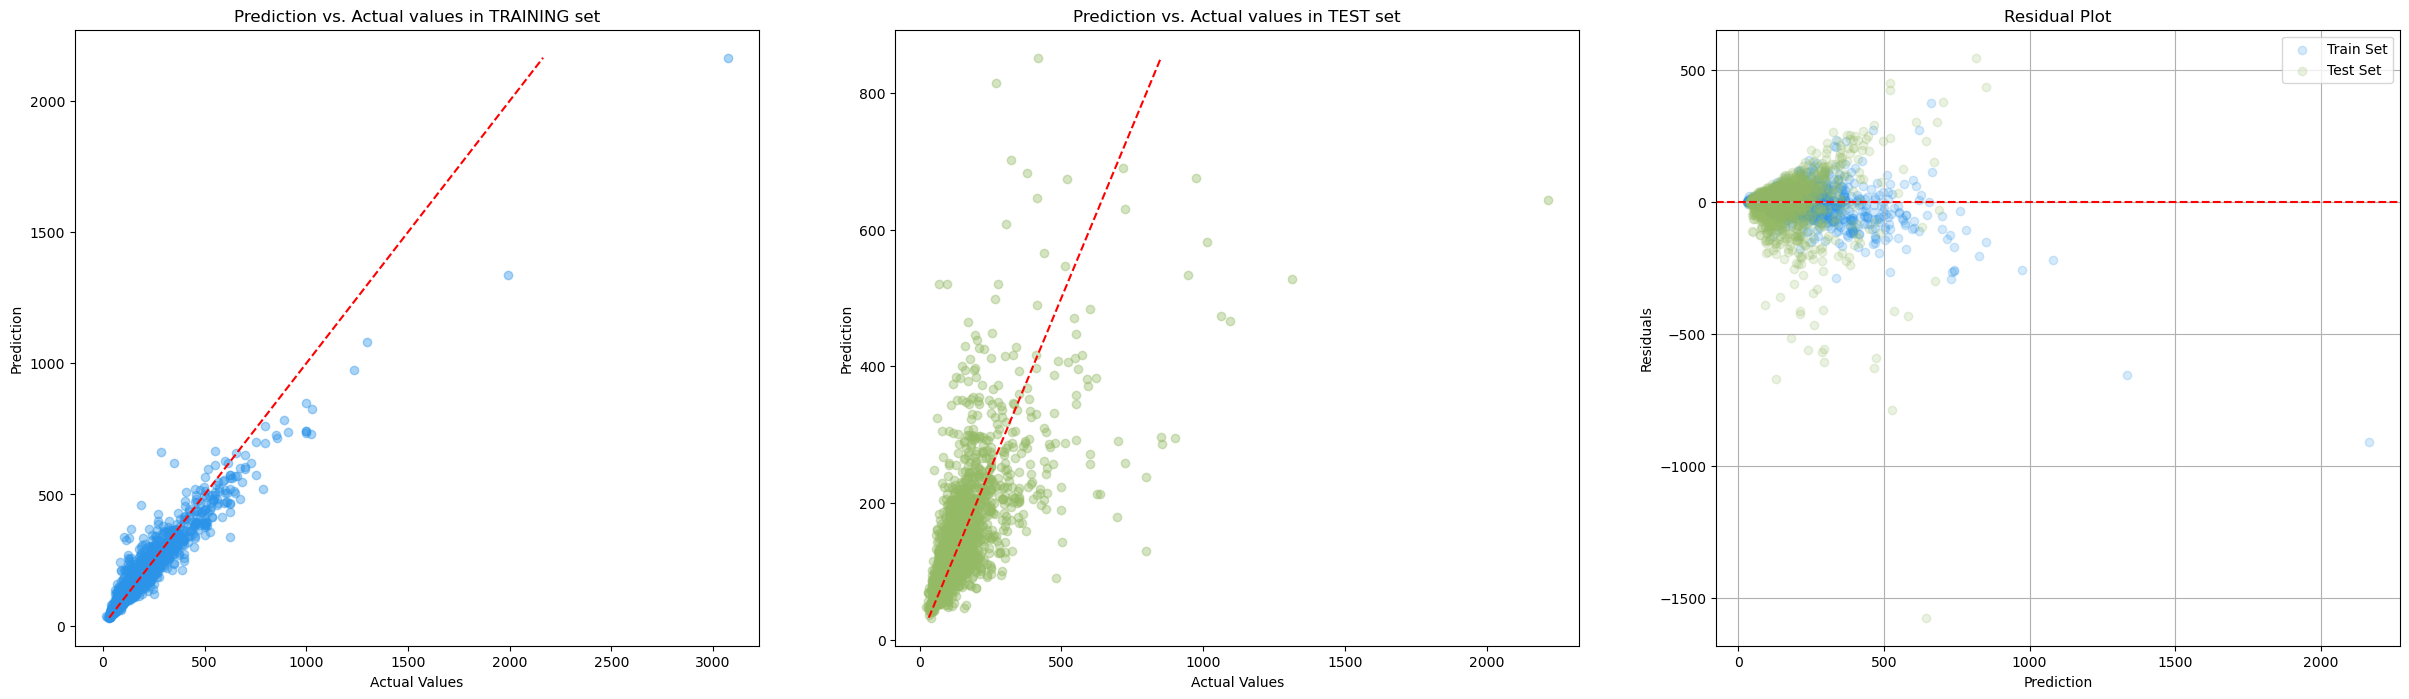

In [9]:
analyze_plot(rf_model, X, y, X_train, X_test, y_train, y_test)